In [7]:
import pandas as pd


df = pd.read_json('final_data/HA_ALL_nonllm.json', orient='records', lines=True)

df

,paper_id,title,abstract,review_text,authors,reviewer,review_date,review_rating,review_confidence,review_soundness,...,llm_citation_usage,llm_sentiment_polarity,llm_politeness,llm_hedging,llm_specificity,llm_domain_terms,llm_relevance_alignment,llm_readability,llm_overall_quality,llm_overall_score_100
0,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,**Summary:** \nThis paper presents an open-sou...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_EGJf,1701662567826,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
1,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,This paper proposes a comprehensive library fo...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_DWom,1699636125239,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
2,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"This author introduces LyCORIS, an open source...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_PnHf,1699636125143,6.0,4.0,4.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
3,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"The authors propose LyCORIS, an open-source li...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_ekPo,1699636125075,8.0,4.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
4,0,$\nu$-ensembles: Improving deep ensemble calib...,We present a method to improve the calibration...,"This paper introduces ν-ensembles, a novel dee...","['~Konstantinos_Pitas1', '~Julyan_Arbel1']",Reviewer_HFRa,1699636992453,3.0,4.0,2.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,118,Module Extraction for Efficient Object Query o...,The extraction of logically-independent fragme...,The submission addresses the problem of partit...,None,Anonymous,03/May/2014,NaN,NaN,NaN,...,False,negative,impolite,Heavy,5,2.0,1.0,3.0,40.0,20
657,61,EARTh: an Environmental Application Reference ...,The paper aims at providing a description of E...,This revision addresses my concerns. I am part...,None,Natasha Noy,22/Jul/2013,NaN,NaN,NaN,...,True,neutral,neutral,Minimal,somewhat specific,4.0,3.0,5.0,85.0,85
658,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",The paper presents and compares RDF/XML (in th...,None,Anonymous,15/Jun/2013,NaN,NaN,NaN,...,no,neutral,neutral,Moderate,somewhat specific,2.0,4.0,3.0,64.0,72
659,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",This paper investigates two different approach...,None,Ghislain Hachey,17/Jun/2013,NaN,NaN,NaN,...,yes,neutral,neutral,Minimal,somewhat specific,3.0,4.0,5.0,68.0,74


In [8]:
# for rows with null value in their review_suggestion, put the value as follows: review_rating < 4: reject, review_rating >= 4 and < 6: revision, review_rating >= 6: accept
def fill_review_suggestion(row):
    if row['review_suggestion'] is None:
        if row['review_rating'] < 4:
            return 'Reject'
        elif 4 <= row['review_rating'] < 6:
            return 'Revision'
        elif row['review_rating'] >= 6:
            return 'Accept'
    else:
        return row['review_suggestion']
df['review_suggestion'] = df.apply(fill_review_suggestion, axis=1)
df

,paper_id,title,abstract,review_text,authors,reviewer,review_date,review_rating,review_confidence,review_soundness,...,llm_citation_usage,llm_sentiment_polarity,llm_politeness,llm_hedging,llm_specificity,llm_domain_terms,llm_relevance_alignment,llm_readability,llm_overall_quality,llm_overall_score_100
0,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,**Summary:** \nThis paper presents an open-sou...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_EGJf,1701662567826,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
1,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,This paper proposes a comprehensive library fo...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_DWom,1699636125239,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
2,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"This author introduces LyCORIS, an open source...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_PnHf,1699636125143,6.0,4.0,4.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
3,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"The authors propose LyCORIS, an open-source li...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_ekPo,1699636125075,8.0,4.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
4,0,$\nu$-ensembles: Improving deep ensemble calib...,We present a method to improve the calibration...,"This paper introduces ν-ensembles, a novel dee...","['~Konstantinos_Pitas1', '~Julyan_Arbel1']",Reviewer_HFRa,1699636992453,3.0,4.0,2.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,118,Module Extraction for Efficient Object Query o...,The extraction of logically-independent fragme...,The submission addresses the problem of partit...,None,Anonymous,03/May/2014,NaN,NaN,NaN,...,False,negative,impolite,Heavy,5,2.0,1.0,3.0,40.0,20
657,61,EARTh: an Environmental Application Reference ...,The paper aims at providing a description of E...,This revision addresses my concerns. I am part...,None,Natasha Noy,22/Jul/2013,NaN,NaN,NaN,...,True,neutral,neutral,Minimal,somewhat specific,4.0,3.0,5.0,85.0,85
658,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",The paper presents and compares RDF/XML (in th...,None,Anonymous,15/Jun/2013,NaN,NaN,NaN,...,no,neutral,neutral,Moderate,somewhat specific,2.0,4.0,3.0,64.0,72
659,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",This paper investigates two different approach...,None,Ghislain Hachey,17/Jun/2013,NaN,NaN,NaN,...,yes,neutral,neutral,Minimal,somewhat specific,3.0,4.0,5.0,68.0,74


In [9]:
# in review_suggestion, replace Approved With Reservations with Revision, Approved with Accept, Not Approved with Reject
def replace_review_suggestion(row):
    if row['review_suggestion'] == 'Approved With Reservations':
        return 'Revision'
    elif row['review_suggestion'] == 'Approved':
        return 'Accept'
    elif row['review_suggestion'] == 'Not Approved':
        return 'Reject'
    else:
        return row['review_suggestion']
df['review_suggestion'] = df.apply(replace_review_suggestion, axis=1)
df

,paper_id,title,abstract,review_text,authors,reviewer,review_date,review_rating,review_confidence,review_soundness,...,llm_citation_usage,llm_sentiment_polarity,llm_politeness,llm_hedging,llm_specificity,llm_domain_terms,llm_relevance_alignment,llm_readability,llm_overall_quality,llm_overall_score_100
0,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,**Summary:** \nThis paper presents an open-sou...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_EGJf,1701662567826,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
1,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,This paper proposes a comprehensive library fo...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_DWom,1699636125239,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
2,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"This author introduces LyCORIS, an open source...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_PnHf,1699636125143,6.0,4.0,4.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
3,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"The authors propose LyCORIS, an open-source li...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_ekPo,1699636125075,8.0,4.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
4,0,$\nu$-ensembles: Improving deep ensemble calib...,We present a method to improve the calibration...,"This paper introduces ν-ensembles, a novel dee...","['~Konstantinos_Pitas1', '~Julyan_Arbel1']",Reviewer_HFRa,1699636992453,3.0,4.0,2.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,118,Module Extraction for Efficient Object Query o...,The extraction of logically-independent fragme...,The submission addresses the problem of partit...,None,Anonymous,03/May/2014,NaN,NaN,NaN,...,False,negative,impolite,Heavy,5,2.0,1.0,3.0,40.0,20
657,61,EARTh: an Environmental Application Reference ...,The paper aims at providing a description of E...,This revision addresses my concerns. I am part...,None,Natasha Noy,22/Jul/2013,NaN,NaN,NaN,...,True,neutral,neutral,Minimal,somewhat specific,4.0,3.0,5.0,85.0,85
658,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",The paper presents and compares RDF/XML (in th...,None,Anonymous,15/Jun/2013,NaN,NaN,NaN,...,no,neutral,neutral,Moderate,somewhat specific,2.0,4.0,3.0,64.0,72
659,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",This paper investigates two different approach...,None,Ghislain Hachey,17/Jun/2013,NaN,NaN,NaN,...,yes,neutral,neutral,Minimal,somewhat specific,3.0,4.0,5.0,68.0,74


In [11]:
# in review_suggestion, replace Major Revision and Minor Revision with Revision
def replace_review_suggestion(row):
    if row['review_suggestion'] == 'Major Revision':
        return 'Revision'
    elif row['review_suggestion'] == 'Minor Revision':
        return 'Revision'
    else:
        return row['review_suggestion']
df['review_suggestion'] = df.apply(replace_review_suggestion, axis=1)
df

,paper_id,title,abstract,review_text,authors,reviewer,review_date,review_rating,review_confidence,review_soundness,...,llm_citation_usage,llm_sentiment_polarity,llm_politeness,llm_hedging,llm_specificity,llm_domain_terms,llm_relevance_alignment,llm_readability,llm_overall_quality,llm_overall_score_100
0,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,**Summary:** \nThis paper presents an open-sou...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_EGJf,1701662567826,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
1,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,This paper proposes a comprehensive library fo...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_DWom,1699636125239,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
2,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"This author introduces LyCORIS, an open source...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_PnHf,1699636125143,6.0,4.0,4.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
3,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"The authors propose LyCORIS, an open-source li...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_ekPo,1699636125075,8.0,4.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
4,0,$\nu$-ensembles: Improving deep ensemble calib...,We present a method to improve the calibration...,"This paper introduces ν-ensembles, a novel dee...","['~Konstantinos_Pitas1', '~Julyan_Arbel1']",Reviewer_HFRa,1699636992453,3.0,4.0,2.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,118,Module Extraction for Efficient Object Query o...,The extraction of logically-independent fragme...,The submission addresses the problem of partit...,None,Anonymous,03/May/2014,NaN,NaN,NaN,...,False,negative,impolite,Heavy,5,2.0,1.0,3.0,40.0,20
657,61,EARTh: an Environmental Application Reference ...,The paper aims at providing a description of E...,This revision addresses my concerns. I am part...,None,Natasha Noy,22/Jul/2013,NaN,NaN,NaN,...,True,neutral,neutral,Minimal,somewhat specific,4.0,3.0,5.0,85.0,85
658,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",The paper presents and compares RDF/XML (in th...,None,Anonymous,15/Jun/2013,NaN,NaN,NaN,...,no,neutral,neutral,Moderate,somewhat specific,2.0,4.0,3.0,64.0,72
659,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",This paper investigates two different approach...,None,Ghislain Hachey,17/Jun/2013,NaN,NaN,NaN,...,yes,neutral,neutral,Minimal,somewhat specific,3.0,4.0,5.0,68.0,74


In [12]:
# in review_suggestion, replace any value that has accept term in it with Accept and any value that has reject term in it with Reject
def replace_review_suggestion(row):
    if 'accept' in row['review_suggestion'].lower():
        return 'Accept'
    elif 'reject' in row['review_suggestion'].lower():
        return 'Reject'
    else:
        return row['review_suggestion']
df['review_suggestion'] = df.apply(replace_review_suggestion, axis=1)
df

,paper_id,title,abstract,review_text,authors,reviewer,review_date,review_rating,review_confidence,review_soundness,...,llm_citation_usage,llm_sentiment_polarity,llm_politeness,llm_hedging,llm_specificity,llm_domain_terms,llm_relevance_alignment,llm_readability,llm_overall_quality,llm_overall_score_100
0,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,**Summary:** \nThis paper presents an open-sou...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_EGJf,1701662567826,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
1,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,This paper proposes a comprehensive library fo...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_DWom,1699636125239,6.0,3.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
2,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"This author introduces LyCORIS, an open source...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_PnHf,1699636125143,6.0,4.0,4.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
3,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"The authors propose LyCORIS, an open-source li...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_ekPo,1699636125075,8.0,4.0,3.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
4,0,$\nu$-ensembles: Improving deep ensemble calib...,We present a method to improve the calibration...,"This paper introduces ν-ensembles, a novel dee...","['~Konstantinos_Pitas1', '~Julyan_Arbel1']",Reviewer_HFRa,1699636992453,3.0,4.0,2.0,...,None,None,None,None,None,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,118,Module Extraction for Efficient Object Query o...,The extraction of logically-independent fragme...,The submission addresses the problem of partit...,None,Anonymous,03/May/2014,NaN,NaN,NaN,...,False,negative,impolite,Heavy,5,2.0,1.0,3.0,40.0,20
657,61,EARTh: an Environmental Application Reference ...,The paper aims at providing a description of E...,This revision addresses my concerns. I am part...,None,Natasha Noy,22/Jul/2013,NaN,NaN,NaN,...,True,neutral,neutral,Minimal,somewhat specific,4.0,3.0,5.0,85.0,85
658,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",The paper presents and compares RDF/XML (in th...,None,Anonymous,15/Jun/2013,NaN,NaN,NaN,...,no,neutral,neutral,Moderate,somewhat specific,2.0,4.0,3.0,64.0,72
659,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",This paper investigates two different approach...,None,Ghislain Hachey,17/Jun/2013,NaN,NaN,NaN,...,yes,neutral,neutral,Minimal,somewhat specific,3.0,4.0,5.0,68.0,74


In [15]:
# drop all columns except for review_suggestion, paper_id, reviewer, venue
df_decision = df[['paper_id', 'review_suggestion', 'reviewer', 'venue']]
df_decision

,paper_id,review_suggestion,reviewer,venue
0,123,Accept,Reviewer_EGJf,iclr
1,123,Accept,Reviewer_DWom,iclr
2,123,Accept,Reviewer_PnHf,iclr
3,123,Accept,Reviewer_ekPo,iclr
4,0,Reject,Reviewer_HFRa,iclr
...,...,...,...,...
656,118,Reject,Anonymous,semanticweb
657,61,Accept,Natasha Noy,semanticweb
658,76,Reject,Anonymous,semanticweb
659,76,Reject,Ghislain Hachey,semanticweb


In [20]:
# in df_decision['reviewer], replace all ' ' and '_' with '-'
def replace_reviewer(row):
    return row['reviewer'].replace(' ', '-').replace('_', '-')
df_decision['reviewer'] = df_decision.apply(replace_reviewer, axis=1)
df_decision

,paper_id,review_suggestion,reviewer,venue
0,123,Accept,Reviewer-EGJf,iclr
1,123,Accept,Reviewer-DWom,iclr
2,123,Accept,Reviewer-PnHf,iclr
3,123,Accept,Reviewer-ekPo,iclr
4,0,Reject,Reviewer-HFRa,iclr
...,...,...,...,...
656,118,Reject,Anonymous,semanticweb
657,61,Accept,Natasha-Noy,semanticweb
658,76,Reject,Anonymous,semanticweb
659,76,Reject,Ghislain-Hachey,semanticweb


In [21]:
import os
import glob
import json
import pandas as pd


def load_reviews(folder_path):
    rows = []
    # find all JSON files in the folder
    for file_path in glob.glob(os.path.join(folder_path, '*.json')):
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        paper_id = data.get('paper_id')
        assessor = data.get('assessor')
        metrics = data.get('metrics', {})
        
        # group metrics by reviewer name
        reviewer_metrics = {}
        for key, value in metrics.items():
            # only process keys that start with "review_"
            if not key.startswith('review_'):
                continue
            parts = key.split('_')
            reviewer = parts[1]                          # e.g. "Palwinder-Singh"
            metric_name = '_'.join(parts[2:])            # e.g. "Comprehensiveness"
            
            reviewer_metrics.setdefault(reviewer, {})
            reviewer_metrics[reviewer][metric_name] = value
        
        # turn each reviewer’s metrics into a row
        for reviewer, mdict in reviewer_metrics.items():
            row = {
                'paper_id': paper_id,
                'assessor': assessor,
                'reviewer': reviewer
            }
            row.update(mdict)
            rows.append(row)
    
    # build the final DataFrame
    df = pd.DataFrame(rows)
    return df

# Example usage:
folder = 'Human_Annotation_Data'
df_human = load_reviews(folder)

# show the first few rows
df_human = df_human[df_human['Overall_Quality'] > 10]
df_human

,paper_id,assessor,reviewer,Comprehensiveness,Usage_of_Technical_Terms,Factuality,Sentiment_Polarity,Politeness,Vagueness,Objectivity,Fairness,Actionability,Constructiveness,Relevance_Alignment,Clarity_and_Readability,Overall_Quality
0,166,Sajad-Ebrahimi,Reviewer-7mFW,2,4,factual,neutral,polite,high,4,4,4,3,4,4,67
1,166,Sajad-Ebrahimi,Reviewer-FAWm,4,4,factual,neutral,polite,none,4,4,5,5,5,4,86
2,166,Sajad-Ebrahimi,Reviewer-kjkr,3,4,factual,neutral,polite,low,4,4,5,5,4,5,75
3,100,Seyed,Enrico-Daga,3,2,factual,positive,polite,none,4,5,4,4,4,4,80
4,100,Seyed,Julia-Bosque,5,4,factual,positive,polite,low,4,4,4,4,5,4,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,75,Ali-Ghorbanpour,Reviewer-s437,3,3,partially factual,neutral,polite,low,2,3,2,3,3,3,55
484,75,Ali-Ghorbanpour,Reviewer-mMGf,4,4,factual,negative,polite,none,4,4,4,5,4,4,80
485,75,Ali-Ghorbanpour,Reviewer-AtQ2,5,4,factual,positive,polite,none,4,4,3,4,4,5,90
486,75,Ali-Ghorbanpour,Reviewer-v6cq,2,3,partially factual,positive,polite,moderate,3,3,2,3,3,3,50


In [22]:
df_human = df_human[['paper_id', 'reviewer', 'assessor', 'Overall_Quality']]
df_human

,paper_id,reviewer,assessor,Overall_Quality
0,166,Reviewer-7mFW,Sajad-Ebrahimi,67
1,166,Reviewer-FAWm,Sajad-Ebrahimi,86
2,166,Reviewer-kjkr,Sajad-Ebrahimi,75
3,100,Enrico-Daga,Seyed,80
4,100,Julia-Bosque,Seyed,87
...,...,...,...,...
483,75,Reviewer-s437,Ali-Ghorbanpour,55
484,75,Reviewer-mMGf,Ali-Ghorbanpour,80
485,75,Reviewer-AtQ2,Ali-Ghorbanpour,90
486,75,Reviewer-v6cq,Ali-Ghorbanpour,50


In [23]:
# merge df_human and df_decision on paper_id and reviewer
df_human['paper_id'] = df_human['paper_id'].astype(int)
df_decision['paper_id'] = df_decision['paper_id'].astype(int)
df_human['reviewer'] = df_human['reviewer'].astype(str)
df_decision['reviewer'] = df_decision['reviewer'].astype(str)

df_merge = pd.merge(df_human, df_decision, on=['paper_id', 'reviewer'], how='inner')
df_merge

/tmp/ipykernel_2456184/1721459049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human['paper_id'] = df_human['paper_id'].astype(int)
/tmp/ipykernel_2456184/1721459049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human['reviewer'] = df_human['reviewer'].astype(str)


,paper_id,reviewer,assessor,Overall_Quality,review_suggestion,venue
0,166,Reviewer-7mFW,Sajad-Ebrahimi,67,Accept,iclr
1,166,Reviewer-FAWm,Sajad-Ebrahimi,86,Accept,iclr
2,166,Reviewer-kjkr,Sajad-Ebrahimi,75,Accept,iclr
3,100,Enrico-Daga,Seyed,80,Accept,semanticweb
4,100,Julia-Bosque,Seyed,87,Accept,semanticweb
...,...,...,...,...,...,...
470,75,Reviewer-s437,Ali-Ghorbanpour,55,Accept,neurips
471,75,Reviewer-mMGf,Ali-Ghorbanpour,80,Revision,neurips
472,75,Reviewer-AtQ2,Ali-Ghorbanpour,90,Revision,neurips
473,75,Reviewer-v6cq,Ali-Ghorbanpour,50,Accept,neurips


In [25]:
df_iclr = df_merge[df_merge['venue'] == 'iclr']
df_neurips = df_merge[df_merge['venue'] == 'neurips']
df_sw = df_merge[df_merge['venue'] == 'semanticweb']
df_f1000 = df_merge[df_merge['venue'] == 'f1000']

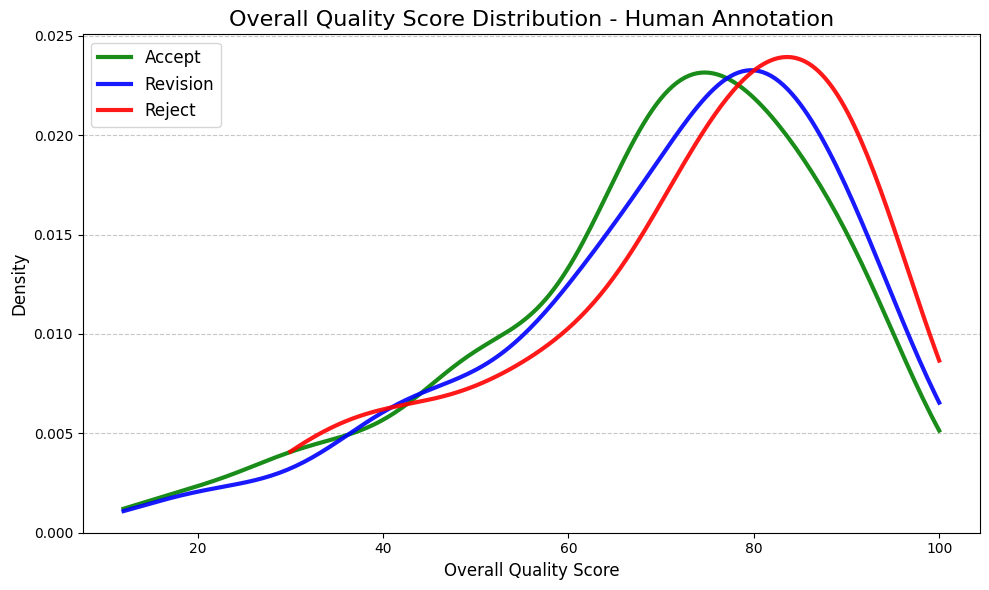

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define a function to plot politeness_score per decision distribution
def plot_distribution(df, title):
    # Add a decision column based on review_rating [1, 4) reject, [4, 6) revision, [6, 10] accept
    # df['decision'] = pd.cut(df['Overall_Quality'], bins=[0, 4, 6, 10], labels=['Reject', 'Revision', 'Accept'], right=False)
    
    # Plot politeness_score distribution
    plt.figure(figsize=(10, 6))
    for decision in df['review_suggestion'].unique():
        sns.kdeplot(
            data=df[df['review_suggestion'] == decision],
            x='Overall_Quality',
            label=decision,
            color=color_map.get(decision, 'black'),
            fill=False,
            alpha=0.9,
            linewidth=3,
            cut=0
        )
    plt.title(f"Overall Quality Score Distribution - {title}", fontsize=16)
    plt.xlabel("Overall Quality Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot

plot_distribution(df_merge, 'Human Annotation')

# for df in [df_iclr, df_neurips, df_sw, df_f1000]:
#     plot_distribution(df, 'Human Annotation')